In [65]:
import numpy as np
import h3 
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point


In [66]:
df = pd.read_csv('./pres_abs_data2.csv')
df

,h3_04,predictions,test
0,848c101ffffffff,1.130857e-01,1
1,8495a4dffffffff,2.222358e-01,1
2,8465005ffffffff,1.621999e-01,1
3,8465229ffffffff,1.233288e-02,1
4,848db59ffffffff,2.303295e-01,1
...,...,...,...
2428,8426e3dffffffff,1.184468e-06,0
2429,84bb547ffffffff,6.016925e-08,0
2430,848d8c9ffffffff,1.075833e-01,0
2431,84118e9ffffffff,8.976311e-07,0


In [67]:

# Compute center coordinates for each H3 cell
centers = [h3.h3_to_geo(cell) for cell in df[df['test'] == 1]['h3_04']]
# Create a GeoDataFrame to store the center points
geometry = [Point(lon, lat) for lat, lon in centers]
crs = "EPSG:4326"  # WGS84 coordinate reference system
gdf1 = gpd.GeoDataFrame(geometry=geometry, crs=crs)

# Compute center coordinates for each H3 cell
centers = [h3.h3_to_geo(cell) for cell in df[df['test'] == 0]['h3_04']]
# Create a GeoDataFrame to store the center points
geometry = [Point(lon, lat) for lat, lon in centers]
crs = "EPSG:4326"  # WGS84 coordinate reference system
gdf2 = gpd.GeoDataFrame(geometry=geometry, crs=crs)


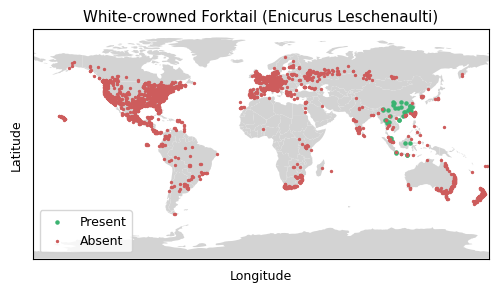

In [68]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 9})

# initialize an axis
fig, ax = plt.subplots(figsize=(6,3))
# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgray", ax=ax)

gdf1.plot(color="mediumseagreen",  markersize=5, ax=ax, label="Present")
gdf2.plot(color="indianred", markersize=2, ax=ax, label="Absent")


ax.set_xlim([-180, 180])
ax.set_ylim([-90, 90])

plt.legend()

# Remove x and y ticks
plt.xticks([])
plt.yticks([])

#plt.title("Presence-Absense for Eared Pygmy-Tyrant (Myiornis auricularis)")
plt.title("White-crowned Forktail (Enicurus Leschenaulti)")

plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.tight_layout()

#plt.savefig("./presence-absence-plot.pdf")